In [35]:
import functions as fx
import log_reg_functions as lrf
import loaddata as ld
import NeuralNetwork as nn
import LogisticRegression as lr

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, roc_auc_score

# A ) 
Here we will load the dataset, then split it into train, validation and test data. 
As the Credit Card data is biased, we also create a downzised dataset.

In [36]:
# Reading in credit card dataset.
x,y = ld.load_data(scaler='minmax')

# Extracting all datapoints where the output is 1 (i.e paying credit card dept).
indices = np.where(y == 1)
indices_zero = np.where(y == 0)
# Randomly extracting equal amount of datapoints where the output is 0 (i.e defaulting).
datapoints = np.random.choice(indices_zero[0], size=y[indices[0]].shape[0], replace=False)

#Stacking the two datasets
x_new = np.vstack((x[indices[0],:],x[datapoints,:]))
y_new = np.vstack((y[indices[0]],y[datapoints]))

# Splitting data in train and test data
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y_new, test_size=0.20, random_state= 0, shuffle=True)
# Splitting in train and validation
xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain, test_size=0.125, random_state= 0, shuffle=True)

# Extracting some useful shapes.
nx_train, ny_train = xtrain.shape
nx_test, ny_test = xtest.shape


# B) 
Egen logistic regression med gradient descent.


In [37]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)
classified = dict()
norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()

for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_val, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, solver='gd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k

    

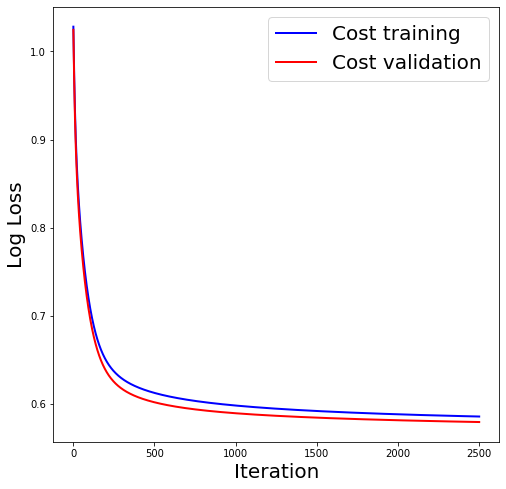

In [38]:

plt.figure(figsize=([8,8]))
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Iteration',fontsize=20)
plt.show()

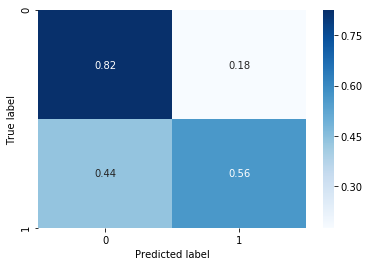

In [39]:
import seaborn as sns

fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()      


# Accuracy. 
Både egen kode og tester med scikit. 

In [45]:
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')



69.79353281087947 % Training accuracy
69.76335097272286 % Test accuracy
0.6509906328792503 % Training f1 score
0.6503852708369331 % Test f1 score


# Egen logistisk regresjon med stokastisk gradient descent

In [46]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)
classified = dict()
norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()

for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_val, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, solver='sgd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k


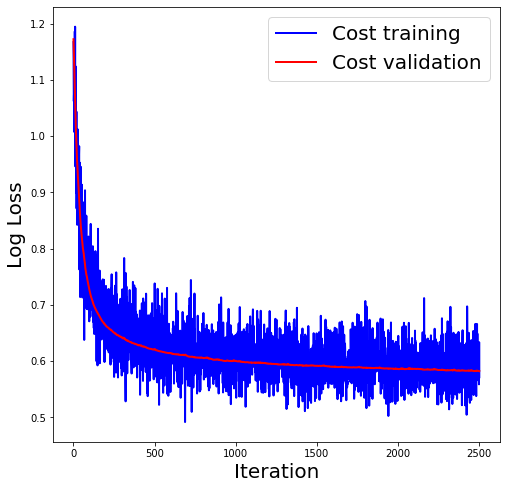

In [47]:
plt.figure(figsize=([8,8]))
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Iteration',fontsize=20)
plt.show()

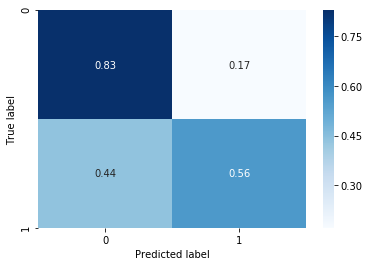

In [48]:
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()

In [49]:
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

69.94237681918295 % Training accuracy
69.40176053037469 % Test accuracy
0.6529990530287156 % Training f1 score
0.6466196857264225 % Test f1 score


In [50]:

model = LogisticRegression()
model.fit(xtrain, ytrain)
predicted_classes = model.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytrain, predicted_classes)

print(accuracy, '% Training Accuracy')

predicted_classes = model.predict(xval)
accuracy = accuracy_score(yval.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(yval, predicted_classes)

print(accuracy, '% Validation Accuracy')

predicted_classes = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytest, predicted_classes)

print(accuracy, '% Test Accuracy')

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70.4331450094162 % Training Accuracy
71.61144578313254 % Validation Accuracy
70.81447963800905 % Test Accuracy


# C) 
Neural Network. 

In [63]:
epochs=1
batch_size=int(len(ytrain)/20)
n_features=x.shape[1]
etavec = np.logspace(-6, -1, 6)
lmbvec = np.logspace(-6, -1, 6)
lmbvec[0]=0

activation = [lrf.relu, lrf.sigmoid, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.sigmoid_deriv, lrf.sigmoid_deriv]

train_accuracy = np.zeros((len(etavec), len(lmbvec)))
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)
norm = np.zeros([2,2])
accuracy_train = np.zeros((len(etavec), len(lmbvec)))
accuracy_test = np.zeros((len(etavec), len(lmbvec)))
f1_train = np.zeros((len(etavec), len(lmbvec)))
f1_test = np.zeros((len(etavec), len(lmbvec)))
test_loss = np.zeros((len(etavec), len(lmbvec)))
test_f1 = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):  
        for kf in range(k):
            xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
            xtrain = np.concatenate(xtrain,axis=0)
            ytrain = y_folds[np.arange(len(y_folds))!=kf]
            ytrain = np.concatenate(ytrain,axis=0)
            xtest  = x_folds[kf]
            ytest  = y_folds[kf]
            
            np.random.seed(2019)
            neural_net = nn.ANN(lmb=lmb, bias=0, eta=etas,early_stop_tol = 10e-04,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
            neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)

            neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=False)

            pred = neural_net.feed_out(xtest, activation)
            test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
            test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
            classified=np.round(pred)
            
            accuracy_test[i,j] += 100*np.sum(classified==ytest)/len(classified)
            f1_test[i,j] += f1_score(ytest, classified)
            norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
            classified=np.round(neural_net.feed_out(xtrain, activation))   
            accuracy_train[i,j] += 100*np.sum(classified==ytrain)/len(classified)
            f1_train[i,j] += f1_score(ytrain, classified)
        print('test loss for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', test_loss [i,j]/k)

norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k



test loss for η = 1e-06 & λ = 0.0 = 0.7487681264467089
test loss for η = 1e-06 & λ = 1e-05 = 0.7487681264438306
test loss for η = 1e-06 & λ = 0.0001 = 0.7487681264179266
test loss for η = 1e-06 & λ = 0.001 = 0.7487681261588862
test loss for η = 1e-06 & λ = 0.01 = 0.7487681235684818
test loss for η = 1e-06 & λ = 0.1 = 0.7487680976644214
test loss for η = 1e-05 & λ = 0.0 = 0.7487678050864285
test loss for η = 1e-05 & λ = 1e-05 = 0.7487678050576473
test loss for η = 1e-05 & λ = 0.0001 = 0.7487678047986155
test loss for η = 1e-05 & λ = 0.001 = 0.7487678022082969
test loss for η = 1e-05 & λ = 0.01 = 0.7487677763050942
test loss for η = 1e-05 & λ = 0.1 = 0.748767517271336
test loss for η = 0.0001 & λ = 0.0 = 0.7487645916387143
test loss for η = 0.0001 & λ = 1e-05 = 0.7487645913509965
test loss for η = 0.0001 & λ = 0.0001 = 0.7487645887615357
test loss for η = 0.0001 & λ = 0.001 = 0.7487645628669096
test loss for η = 0.0001 & λ = 0.01 = 0.7487643039189187
test loss for η = 0.0001 & λ = 0.1 = 

In [65]:
test_loss


array([[0.74876813, 0.74876813, 0.74876813, 0.74876813, 0.74876812,
        0.7487681 ],
       [0.74876781, 0.74876781, 0.7487678 , 0.7487678 , 0.74876778,
        0.74876752],
       [0.74876459, 0.74876459, 0.74876459, 0.74876456, 0.7487643 ,
        0.74876171],
       [0.74873245, 0.74873245, 0.74873242, 0.74873217, 0.74872959,
        0.74870376],
       [0.74841095, 0.74841092, 0.74841067, 0.74840817, 0.74838321,
        0.74813197],
       [0.74557374, 0.74557355, 0.74557185, 0.74555486, 0.74538339,
        0.74351488]])

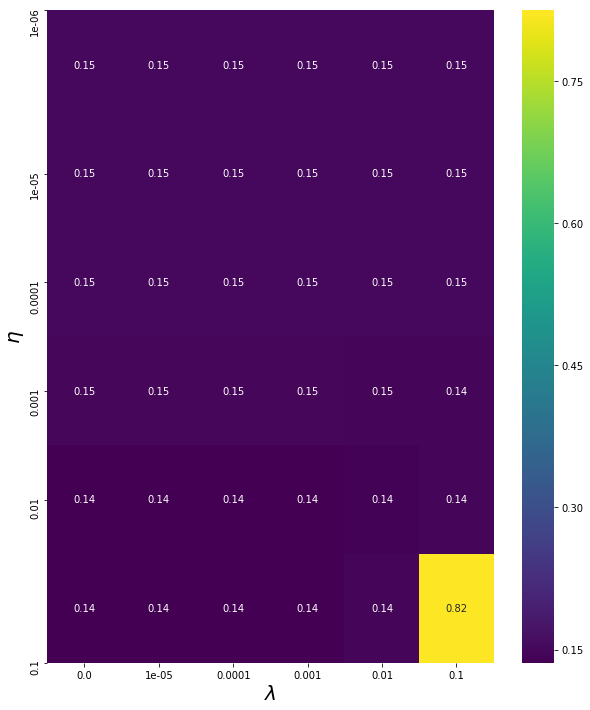

In [58]:
yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(test_loss, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
#ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$", fontsize=20)
ax.set_xlabel("$\lambda$", fontsize=20)
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [59]:
best_eta_index, best_lmb_index = np.where(test_loss == np.min(test_loss))
best_eta,best_lmb = etavec[best_eta_index], lmbvec[best_lmb_index] 
best_lmb = 0
print('eta=',best_eta)
print('lmb=',best_lmb)

eta= [0.1]
lmb= 0


In [54]:
epochs=1000

norm = np.zeros([2,2])
for kf in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=kf]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[kf]
    ytest  = y_folds[kf]
            
    np.random.seed(2019)
    neural_net = nn.ANN(lmb=best_lmb, bias=0, eta=best_eta,early_stop_tol = 0,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
    neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)

    neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=False)

    pred = neural_net.feed_out(xtest, activation)
    test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
    test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
    classified=np.round(pred)
            
    accuracy_test[i,j] += 100*np.sum(classified==ytest)/len(classified)
    f1_test[i,j] += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
    classified=np.round(neural_net.feed_out(xtrain, activation))   
    accuracy_train[i,j] += 100*np.sum(classified==ytrain)/len(classified)
    f1_train[i,j] += f1_score(ytrain, classified)
    print(kf+1)
    
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k
cost_val, cost_train = neural_net.costs()

1
2
3
4
5


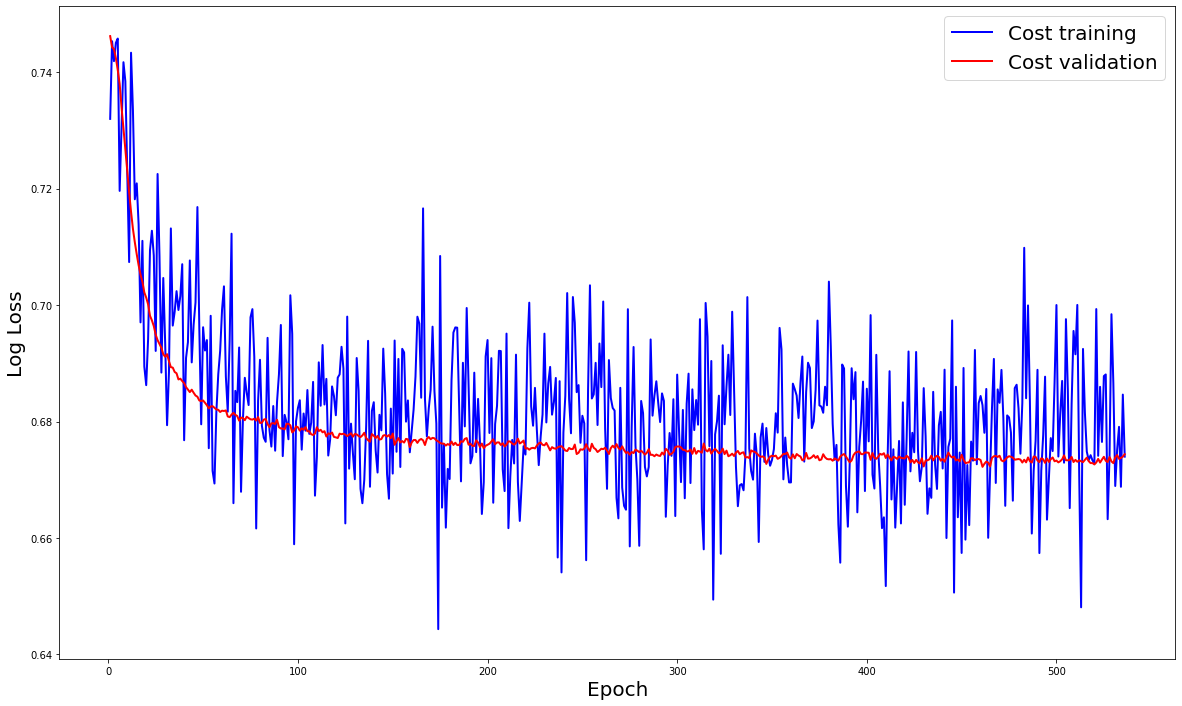

In [55]:
plt.figure(figsize=([20,12]))
axis = np.arange(len(cost_val))+1
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.show()

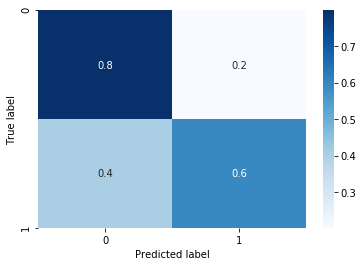

0.6661150186181216
69.57013574660634 % Test Accuracy


In [56]:
classified=np.round(neural_net.feed_out(xtest, activation))
norm = fx.norm_confusion_matrix(ytest, classified, normalize=True)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 
print(f1_score(ytest, classified))
print(100*np.sum(classified==ytest)/len(classified),'% Test Accuracy')


Normalized confusion matrix
[[0.81344902 0.18655098]
 [0.39025433 0.60974567]]


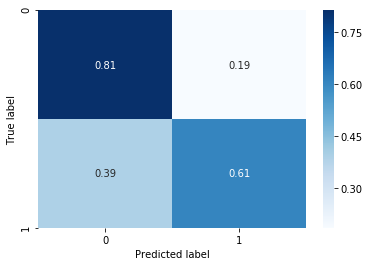

0.6799332697807435
71.08407794165142 % Test Accuracy


In [22]:
classified=np.round(neural_net.feed_out(xtrain, activation))
norm = fx.norm_confusion_matrix(ytrain, classified, normalize=True)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 
print(f1_score(ytrain, classified))
print(100*np.sum(classified==ytrain)/len(classified),'% Test Accuracy')


In [22]:
from sklearn.neural_network import MLPClassifier
# by default MLPClassifier employes l2 regularization


#print("Test set score: %f" % mlp.score(xtest, ytest))
epochs=1000
batch_size=500
n_features=x.shape[1]
etavec = np.logspace(-4, -1, 4)
lmbvec = np.logspace(-7, -3, 5)
lmbvec[0]=0


train_accuracy = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        mlp = MLPClassifier(hidden_layer_sizes=(50,20,), max_iter=2000, alpha=lmb,
                    solver='sgd', verbose=0, tol=1e-4,batch_size=500, random_state=1,
                    learning_rate_init=etas)

        mlp.fit(xtrain, ytrain.ravel())
        print("Training set score: %f" % mlp.score(xval, yval))
        pred = mlp.predict(xval)
        train_accuracy[i,j] =  lrf.cost_log_ols(pred.ravel(),yval.T)
        print('Validation f1_score for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', train_accuracy [i,j])



Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.0 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 1e-06 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 1e-05 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.0001 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.001 = 0.637097362413115
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.0 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 1e-06 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 1e-05 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.0001 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.001 = 0.6274553591914801
Training set score: 0.673946
Validation f1

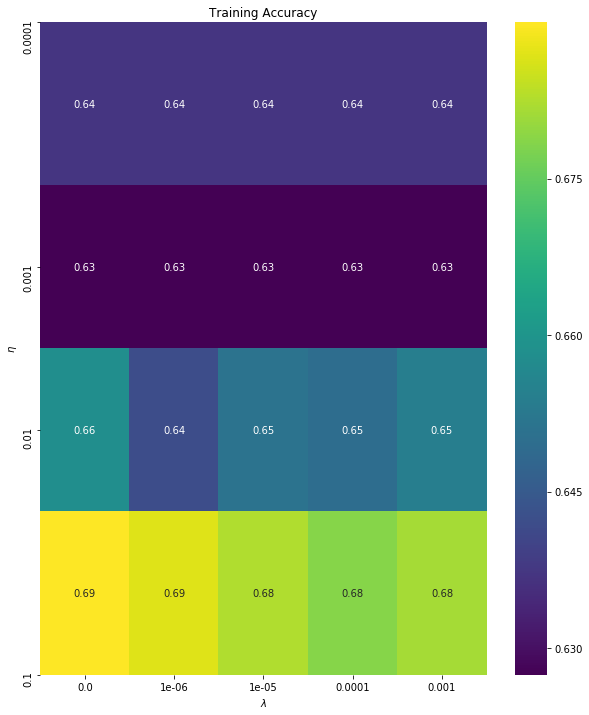

In [23]:
import seaborn as sns
train_accuracy[np.isnan(train_accuracy)]=2

yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [24]:
pred = mlp.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)
print(f1_score(ytest, pred)) 

cm = confusion_matrix(ytest , pred)
print(cm)

66.17702448210923
0.6801994301994302
[[802 573]
 [325 955]]


In [25]:
pred = mlp.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)

cm = confusion_matrix(ytrain , pred)
print(cm)

75.83162880826785
[[3137 1473]
 [ 772 3907]]


# Cancer data

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

xtrain,ytrain = load_breast_cancer(return_X_y=True)
scaler = MinMaxScaler()
indx = np.arange(xtrain.shape[1])
scaler.fit(xtrain[:,indx])
xtrain = scaler.transform(xtrain[:,indx])
ytrain=ytrain.reshape([len(ytrain),1])